In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
yld = pd.read_csv('yield.csv', sep='\s+', index_col=0)
yld.head()

,Temp,Yield
i,,
1,50,3.3
2,50,2.8
3,50,2.9
4,50,3.2
5,60,2.7


In [6]:
yld.shape

(21, 2)

The dataset 'yields.csv', with just 21 cases, contains measurements of the yields from an experiment done at six different levels of temperature in degrees Fahrenheit. 

We will now seperate the DataFrame into the predictor and outcome variables, X and y. We do so by:

    Assigning the 'Yield' column to y
    Dropping the 'Yield' column from the yld DataFrame to create X


In [7]:
X = yld.drop(columns='Yield', axis=1)
y = yld['Yield'] # pop 

# loc, iloc

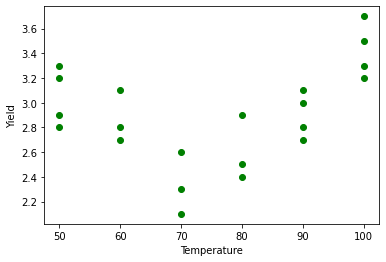

In [8]:
plt.scatter(X, y, color='green')
plt.xlabel('Temperature')
plt.ylabel('Yield');

It's clear that there is no linear relationship between Yield and Temperature. Still Let's try and plot a line anyways and see how the model performs:
##Simple Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)

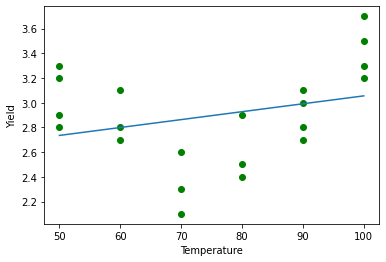

In [10]:
plt.scatter(X, y, color='green')
plt.plot(X, reg.predict(X))
plt.xlabel('Temperature')
plt.ylabel('Yield');

# Simple Regression as Simple Linear Regression

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

mse=mean_squared_error(y, reg.predict(X))
print(mse)

r2_score(y, reg.predict(X)) # see how low R2 is

0.13926747720364743


0.08605718085106373

# A quadratic relationship

When relationships between predictors and outcome are not linear and show some sort of curvature, polynomials can be used to generate better approximations. The idea is that you can transform your input variable by e.g, squaring it. The corresponding model would then be:

In [14]:
X['Temp_sq'] = X['Temp']**2
X.head()

,Temp,Temp_sq
i,,
1,50,2500
2,50,2500
3,50,2500
4,50,2500
5,60,3600


In [15]:
reg_q = LinearRegression().fit(X, y)

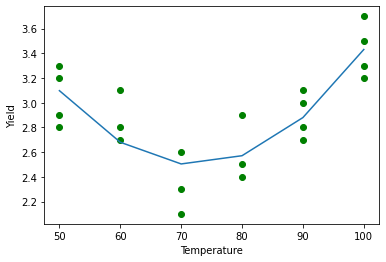

In [16]:
plt.scatter(X['Temp'], y, color='green')
plt.plot(X['Temp'], reg_q.predict(X))
plt.xlabel('Temperature')
plt.ylabel('Yield');

This is the resulting plot. Note that the fit is much better, and this is confirmed by the $R^2$score: where it was 0.086 before, it now is 0.6948!

In [17]:
mean_squared_error(y, reg_q.predict(X))

0.0465041389087916

In [18]:
r2_score(y, reg_q.predict(X))

0.6948165884110551

Note that you get a seemingly "piecewise linear" function here, because the yields were only measured at 50, 60, 70, 80, 90 and 100. In reality, this model generates a smooth curve, as denoted below.

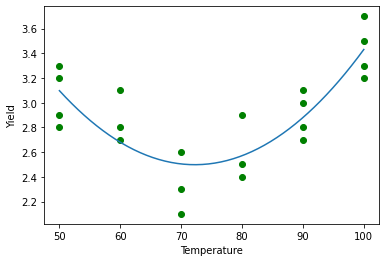

In [19]:
import numpy as np
plt.scatter(X['Temp'], y, color='green')

X_pred = pd.DataFrame(np.linspace(50, 100, 50), columns=['Temp'])
X_pred['Temp_sq'] = X_pred**2 
y_pred = reg_q.predict(X_pred)

plt.plot(X_pred['Temp'], y_pred)
plt.xlabel('Temperature')
plt.ylabel('Yield');

In [21]:
r2_score(y, reg_q.predict(X))

0.6948165884110551

The use of polynomials is not restricted to quadratic relationships. You can explore cubic or higher order relationships as well! Scikit-Learn has a built-in polynomial option in the preprocessing module!

In [22]:
from sklearn.preprocessing import PolynomialFeatures

y = yld['Yield']
X = yld.drop(columns='Yield', axis=1)

poly = PolynomialFeatures(6)
X_fin = poly.fit_transform(X)

##### print('The transformed feature names are: {}'.format(poly.get_feature_names()))
print('------------------')
print('The first row of transformed data is: {}'.format(X_fin[0]))

In [24]:
reg_poly = LinearRegression().fit(X_fin, y)

In [25]:
X_linspace = pd.DataFrame(np.linspace(50, 100, 50), columns=['Temp'])

X_linspace_fin = poly.fit_transform(X_linspace)
y_poly_pred = reg_poly.predict(X_linspace_fin)

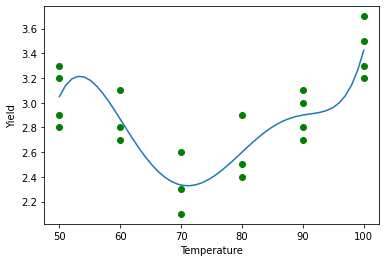

In [26]:
plt.scatter(X['Temp'], y, color='green')
plt.plot(X_linspace, y_poly_pred)
plt.xlabel('Temperature')
plt.ylabel('Yield');

In [27]:
mean_squared_error(y, reg_poly.predict(X_fin))

0.036706349206858356

In [28]:
r2_score(y, reg_poly.predict(X_fin))

0.759114583329992

In [ ]:
# 